In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import zipfile
import os
from keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np


In [31]:
zip_path = "/content/DataSet_Practical6.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("Datasets")

In [32]:
train_dir = '/content/Datasets/trainingSet/'
test_dir = '/content/Datasets/testSet/'


In [33]:
img_gen = ImageDataGenerator(rescale=1.0/255)


In [34]:
train_gen = img_gen.flow_from_directory(
train_dir,
target_size=(32,32),
batch_size=5000,
shuffle=True,
class_mode='categorical'
)

Found 42000 images belonging to 1 classes.


In [35]:
test_gen = img_gen.flow_from_directory(
test_dir,
target_size=(32,32),
batch_size=5000,
shuffle=False,
class_mode='categorical'
)

Found 28000 images belonging to 1 classes.


In [36]:
x_train, y_train = train_gen[0]
x_test, y_test = test_gen[0]


In [37]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
for layer in vgg_model.layers:
    layer.trainable = False

In [38]:
custom_classifier = keras.Sequential([
Flatten(),
Dense(100, activation='relu'),
Dropout(0.2),
Dense(100, activation='relu'),
Dropout(0.2),
Dense(len(train_gen.class_indices), activation='softmax')
])

In [39]:
model = keras.Sequential([
vgg_model,
custom_classifier
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 32, 32, 3) (5000, 1)
(5000, 32, 32, 3) (5000, 1)


In [41]:
model.fit(x_train[:1000], y_train[:1000], batch_size=32, epochs=5, validation_data=(x_test[:500], y_test[:500]))

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 519ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0000e+00

KeyboardInterrupt: 

In [42]:

for layer in vgg_model.layers:
    layer.trainable = False

In [29]:
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - ac

In [43]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, " ", acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 343ms/step - accuracy: 1.0000 - loss: 0.0000e+00
0.0   1.0


In [44]:
pred = model.predict(x_test)
labels = list(train_gen.class_indices.keys())

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 353ms/step


True: trainingSet


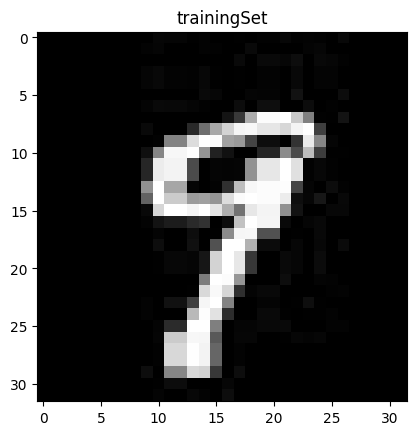

In [45]:
plt.imshow(x_test[10])
plt.title(str(labels[np.argmax(pred[10])]))
print("True:", str(labels[np.argmax(y_test[10])]))